<a href="https://colab.research.google.com/github/MarioAvolio/AI-Project/blob/main/assignment%204/Rescal_with_PyKEEN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip install pykeen

In [20]:
import pykeen
pykeen.env()

Key,Value
OS,posix
Platform,Linux
Release,5.15.109+
Time,Tue Sep 5 18:12:16 2023
Python,3.10.12
PyKEEN,1.10.1
PyKEEN Hash,UNHASHED
PyKEEN Branch,
PyTorch,2.0.1+cu118
CUDA Available?,true


In [21]:
import pandas as pd
import numpy as np


### Load Training Data

In [22]:
data = pd.read_csv("https://raw.githubusercontent.com/ZhenfengLei/KGDatasets/master/Countries/Countries_S1/train.txt", sep="\t", names=["subject", "predicate", "object"])
data

,subject,predicate,object
0,western_africa,locatedin,africa
1,slovakia,neighbor,ukraine
2,slovakia,neighbor,hungary
3,slovakia,neighbor,austria
4,slovakia,neighbor,czechia
...,...,...,...
1106,cambodia,locatedin,south-eastern_asia
1107,panama,locatedin,central_america
1108,anguilla,locatedin,caribbean
1109,cuba,locatedin,caribbean


In [23]:
data_val = pd.read_csv("https://raw.githubusercontent.com/ZhenfengLei/KGDatasets/master/Countries/Countries_S1/valid.txt", sep="\t", names=["subject", "predicate", "object"])

In [24]:
entities = list(set(data["subject"].unique().tolist() + data["object"].unique().tolist()))

In [25]:
entities

['sint_maarten',
 'mexico',
 'eastern_africa',
 'hungary',
 'brazil',
 'belize',
 'germany',
 'kyrgyzstan',
 'grenada',
 'luxembourg',
 'philippines',
 'guatemala',
 'panama',
 'southern_europe',
 'guam',
 'french_guiana',
 'southern_africa',
 'niger',
 'central_america',
 'dr_congo',
 'british_virgin_islands',
 'bahamas',
 'tanzania',
 'wallis_and_futuna',
 'trinidad_and_tobago',
 'north_korea',
 'jamaica',
 'kenya',
 'united_states',
 'samoa',
 'sri_lanka',
 'liberia',
 'portugal',
 'africa',
 'qatar',
 'guadeloupe',
 'united_states_virgin_islands',
 'polynesia',
 'mauritius',
 'bangladesh',
 'singapore',
 'malta',
 'madagascar',
 'hong_kong',
 'egypt',
 'paraguay',
 'western_europe',
 'algeria',
 'europe',
 'italy',
 'mongolia',
 'saint_lucia',
 'iraq',
 'republic_of_the_congo',
 'svalbard_and_jan_mayen',
 'zambia',
 'montserrat',
 'seychelles',
 'bulgaria',
 'saint_martin',
 'peru',
 'vatican_city',
 'myanmar',
 'cambodia',
 'gibraltar',
 'curaçao',
 'western_sahara',
 'kuwait',
 '

In [26]:
number_of_entities = len(entities)

In [27]:
number_of_entities

271

## To PyKEEN TriplesFactory

In [28]:
from pykeen.triples import TriplesFactory

In [29]:
data[["subject", "predicate", "object"]].values

array([['western_africa', 'locatedin', 'africa'],
       ['slovakia', 'neighbor', 'ukraine'],
       ['slovakia', 'neighbor', 'hungary'],
       ...,
       ['anguilla', 'locatedin', 'caribbean'],
       ['cuba', 'locatedin', 'caribbean'],
       ['nauru', 'locatedin', 'oceania']], dtype=object)

In [30]:
training_labels = TriplesFactory.from_labeled_triples(
  data[["subject", "predicate", "object"]].values,
  create_inverse_triples=False,
  entity_to_id=None,
  relation_to_id=None,
  compact_id=True,
  filter_out_candidate_inverse_relations=True,
  metadata=None,
)

testing_labels = TriplesFactory.from_labeled_triples(
  data_val[["subject", "predicate", "object"]].values,
  create_inverse_triples=False,
  entity_to_id=training_labels.entity_to_id,
  relation_to_id=training_labels.relation_to_id,
  compact_id=True,
  filter_out_candidate_inverse_relations=True,
  metadata=None,
)

## Training Pipeline

In [31]:
from pykeen.pipeline import pipeline
import torch

In [36]:
pipeline_result_rescal = pipeline(
    training=training_labels,
    testing=testing_labels,
    #dataset='Countries',
    model='Rescal',
    model_kwargs=dict(embedding_dim=80),
    random_seed=256,
    optimizer = torch.optim.Adam,
    optimizer_kwargs=dict(lr=1.0e-02),
    training_kwargs=dict(num_epochs=100),
)

# epochs = 100
# embedding_size = 80


# params = initialize_parameters(rnd_key, number_of_entities, embedding_size)
# opt_init, opt_update = optax.adam(0.001)
# opt_state = opt_init(params)
# pbar = tqdm(total=epochs, position=0)



INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/100 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=24.


Evaluating on cuda:0:   0%|          | 0.00/24.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds


In [33]:
def print_metrics(pipeline_result):
  print(pipeline_result.training)
  print()
  print('hits@10', pipeline_result.get_metric('hits@10'))
  print('mr', pipeline_result.get_metric('mr'))
  print('mrr', pipeline_result.get_metric('mrr'))
  print()
  pipeline_result.plot_losses()

### Evaluation Metrics

TriplesFactory(num_entities=271, num_relations=2, create_inverse_triples=False, num_triples=1110)

hits@10 0.3541666666666667
mr 58.52083206176758
mrr 0.07983673363924026



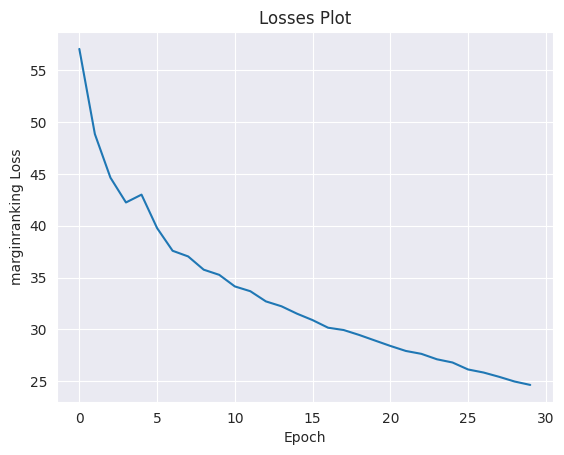

In [34]:
print_metrics(pipeline_result_rescal)

## Predict

In [ ]:
# canada + locatedin = ?
from pykeen.models import predict

predict.get_prediction_df(
    model=pipeline_result_rescal.model, head_label="canada", relation_label="locatedin", triples_factory=pipeline_result_rescal.training,
)

In [ ]:
countries_train_pd.query('head == "italy"')

In [ ]:
# italy + locatedin = ?
predict.get_prediction_df(
    model=pipeline_result_rescal.model, head_label="italy", relation_label="locatedin", triples_factory=pipeline_result_rescal.training,
)

In [ ]:
# italy + neighbor = ?
predict.get_prediction_df(
    model=pipeline_result_rescal.model, head_label="italy", relation_label="neighbor", triples_factory=pipeline_result_rescal.training,
).head(20)

In [ ]:
# vatican_city + neighbor = ?
predict.get_prediction_df(
    model=pipeline_result_rescal.model, head_label="vatican_city", relation_label="neighbor", triples_factory=pipeline_result_rescal.training,
)

## Visualize

In [35]:
entities = list(countries.entity_to_id.keys())

NameError: ignored

In [ ]:
entity_embeddings = pipeline_result_rescal.model.entity_representations[0]().cpu().detach().numpy().astype('float32')
entity_embeddings.shape

In [ ]:
entity_embeddings

In [ ]:
relation_embeddings = pipeline_result_rescal.model.relation_representations[0]().cpu().detach().numpy().astype('float32')
relation_embeddings.shape

In [ ]:
entity_embeddings

In [ ]:
from operator import sub
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def quick_plot(labels, embedding, colors = None, plot = True):
  """
  we ignore the words we are not interested to reduce the time to compute
  the 2D embeddings, but this is an approximation.
  """

  if not colors:
    colors = ['b' for _ in labels]

  X = embedding
  pca = PCA(n_components=2)

  two_d_emb = pca.fit_transform(X)

  plt.scatter(two_d_emb[:, 0], two_d_emb[:, 1], c = colors)

  for index, label in enumerate(labels):
    # annotate
    plt.annotate(label, xy=(two_d_emb[index, 0], two_d_emb[index, 1]), )

  if plot:
    plt.gcf().set_size_inches(20, 10)
    plt.show()

  return plt, pca

In [ ]:
continents = set(countries_train_pd.query('relation == "locatedin"')['tail'].unique())

In [ ]:
def get_color(x):
  if x in continents:
    return 'red'
  else:
    return 'blue'

colors = [get_color(ent) for ent in entities]

In [ ]:
quick_plot(entities, entity_embeddings, colors=colors)